In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [120]:
pricesday_1=pd.read_csv('/Users/aayushmishra/Desktop/IMCProsperity/Data/round-2-island-data-bottle/prices_round_2_day_-1.csv',delimiter=';')
pricesday0=pd.read_csv('/Users/aayushmishra/Desktop/IMCProsperity/Data/round-2-island-data-bottle/prices_round_2_day_0.csv',delimiter=';')
pricesday1=pd.read_csv('/Users/aayushmishra/Desktop/IMCProsperity/Data/round-2-island-data-bottle/prices_round_2_day_1.csv',delimiter=';')
pricesallday = pd.concat([pricesday_1,pricesday0,pricesday1], ignore_index=True)

In [121]:
pricesallday.to_excel("pricesalldays.xlsx", sheet_name="Testing", index=False)
pricesday1

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1
1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1
2,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1
3,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1
4,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1
...,...,...,...,...,...,...,...,...
9996,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.935490,1
9997,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.951530,1
9998,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620,1
9999,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.983780,1


In [122]:
pricesallday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30003 entries, 0 to 30002
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       30003 non-null  int64  
 1   ORCHIDS         30003 non-null  float64
 2   TRANSPORT_FEES  30003 non-null  float64
 3   EXPORT_TARIFF   30003 non-null  float64
 4   IMPORT_TARIFF   30003 non-null  float64
 5   SUNLIGHT        30003 non-null  float64
 6   HUMIDITY        30003 non-null  float64
 7   DAY             30003 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.8 MB


In [123]:
pricesallday.describe()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
count,30003.000000,30003.000000,30003.000000,30003.000000,30003.000000,30003.000000,30003.000000,30003.00000
mean,500000.000000,1103.617855,1.237043,9.728044,-3.405143,2777.073279,79.073562,0.00000
std,288708.812038,81.975222,0.287521,1.368582,1.235526,912.366591,9.366057,0.81651
min,0.000000,960.750000,0.700000,7.500000,-6.500000,1397.304900,59.999580,-1.00000
25%,250000.000000,1039.250000,1.000000,8.500000,-4.500000,1973.018900,71.204712,-1.00000
50%,500000.000000,1081.750000,1.300000,9.500000,-2.600000,2498.066200,78.579020,0.00000
75%,750000.000000,1195.750000,1.400000,10.500000,-2.400000,3619.445200,86.771817,1.00000
max,1000000.000000,1257.250000,2.100000,19.500000,-2.000000,4513.986300,97.513270,1.00000


In [124]:
pricesday_1.describe()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.0
mean,500000.000000,1208.804745,1.400110,10.071043,-2.590221,3619.750103,85.621408,-1.0
std,288718.435504,22.073794,0.195987,1.397579,0.280179,548.985284,4.946191,0.0
min,0.000000,1146.750000,1.100000,8.500000,-3.600000,2471.594000,74.912860,-1.0
25%,250000.000000,1195.750000,1.200000,9.500000,-2.600000,3164.699200,82.979294,-1.0
50%,500000.000000,1209.750000,1.400000,9.500000,-2.600000,3666.911400,85.795170,-1.0
75%,750000.000000,1222.750000,1.500000,10.500000,-2.400000,4027.096400,88.584860,-1.0
max,1000000.000000,1257.250000,2.100000,16.000000,-2.000000,4513.986300,95.209755,-1.0


In [125]:
pricesday0.describe()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.0
mean,500000.000000,1041.251175,1.384912,9.961154,-2.570763,2279.533353,74.036523,0.0
std,288718.435504,45.142712,0.193678,1.584335,0.349321,813.568530,10.199225,0.0
min,0.000000,960.750000,1.100000,8.500000,-4.200000,1397.304900,59.999580,0.0
25%,250000.000000,1001.750000,1.300000,9.500000,-2.600000,1811.042400,67.049130,0.0
50%,500000.000000,1039.250000,1.300000,9.500000,-2.600000,2000.000000,70.277214,0.0
75%,750000.000000,1083.250000,1.500000,10.500000,-2.400000,2400.000000,83.000000,0.0
max,1000000.000000,1122.000000,2.100000,19.500000,-2.000000,4500.338000,95.000000,0.0


In [126]:
pricesday1.describe()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.0
mean,500000.000000,1060.797645,0.926107,9.151935,-5.054445,2431.936381,77.562755,1.0
std,288718.435504,29.101624,0.164156,0.807551,0.546315,676.201827,8.010117,0.0
min,0.000000,1009.250000,0.700000,7.500000,-6.500000,1669.296600,67.536980,1.0
25%,250000.000000,1038.750000,0.800000,8.500000,-5.500000,1951.776000,72.174774,1.0
50%,500000.000000,1053.750000,0.900000,9.500000,-5.000000,2219.208300,74.889440,1.0
75%,750000.000000,1080.750000,1.000000,9.500000,-4.500000,2608.087400,79.031670,1.0
max,1000000.000000,1133.250000,1.700000,13.500000,-4.500000,4219.218000,97.513270,1.0


In [127]:
pricesallday.columns

Index(['timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF',
       'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'DAY'],
      dtype='object')

In [128]:
column_names = ['SUNLIGHT', 'HUMIDITY']
X = pricesallday[column_names]
Y =pricesallday['ORCHIDS']
X.columns

Index(['SUNLIGHT', 'HUMIDITY'], dtype='object')

In [129]:
scaler = StandardScaler()
scaler.fit(X)
X_normalized = scaler.transform(X)


In [130]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(X_normalized, Y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)
# Delete temporary variables
del x_, y_


print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (18001, 2)
the shape of the training set (target) is: (18001,)

the shape of the cross validation set (input) is: (6001, 2)
the shape of the cross validation set (target) is: (6001,)

the shape of the test set (input) is: (6001, 2)
the shape of the test set (target) is: (6001,)


In [131]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train )

LinearRegression()

In [132]:
yhat = linear_model.predict(x_train)


print(f"training MSE : {mean_squared_error(y_train, yhat) / 2}")
yhat = linear_model.predict(x_cv)


print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")
yhatt = linear_model.predict(x_test)
print(f"test MSE: {mean_squared_error(y_test, yhatt) / 2}")
print("Feature Weights:",linear_model.coef_)

training MSE : 1246.3232740883275
Cross validation MSE: 1259.4994130990185
test MSE: 1279.4905082103637
Feature Weights: [37.00997672 35.17643315]


In [133]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', max_depth=2, learning_rate=0.1, n_estimators=10)
xgb_reg.fit(x_train, y_train)


y_predx = xgb_reg.predict(x_train)


e1 = mean_squared_error(y_train, y_predx)
y_predcv = xgb_reg.predict(x_cv)

y_predtest = xgb_reg.predict(x_test)
e2 = mean_squared_error(y_cv, y_predcv)
e3 = mean_squared_error(y_test, y_predtest)
print("train Error:", e1)
print("cv Error:", e2)
print("Test Error:", e3)
print(xgb_reg.feature_importances_)

train Error: 150276.81963655096
cv Error: 150000.19679762205
Test Error: 150667.54578003334
[0.2915933 0.7084067]


In [134]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=60, random_state=42) 
rf_reg.fit(x_train, y_train) 

y_predrf = rf_reg.predict(x_train) 

e4 = mean_squared_error(y_train, y_predrf)
y_predrfcv =rf_reg.predict(x_cv) 
e5 = mean_squared_error(y_cv,y_predrfcv)
y_predrftest =rf_reg.predict(x_test) 
e6 = mean_squared_error(y_test,y_predrftest)
print("train Error:",e4 )
print("cv error:",e5)
print("test error:",e6)
print(rf_reg.feature_importances_)

train Error: 5.439893582891981
cv error: 31.544134253116372
test error: 48.84848849882641
[0.27628421 0.72371579]


In [71]:
from sklearn.metrics import r2_score

# Loop through each variable in X
for col in X.columns:
    # Select the current variable as the feature matrix
    X_single = X[[col]]
    
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_single, Y)
    
    # Predict the target variable
    y_pred = model.predict(X_single)
    
    # Calculate the R^2 score
    r2 = r2_score(Y, y_pred)
    
    # Print the R^2 score
    print(f"Variable: {col}")
    print(f"R^2 Score: {r2}")

Variable: SUNLIGHT
R^2 Score: 0.5222119058634878
Variable: HUMIDITY
R^2 Score: 0.5806799474666421


In [80]:
correlation = X['SUNLIGHT'].corr(Y)
corr =X['HUMIDITY'].corr(Y)
covariance = np.cov(Y,X['SUNLIGHT'])
orchids = np.var(X['SUNLIGHT'])
beta = covariance / orchids

print("Beta of the stock:", orchids)

print("Correlation between SUNLIGHT and ORCHIDS:", correlation)
print("Correlation between HUMIDITY and ORCHIDS:", corr)

Beta of the stock: 661827.5705874811
Correlation between SUNLIGHT and ORCHIDS: 0.7226423083818772
Correlation between HUMIDITY and ORCHIDS: 0.7620235872114739


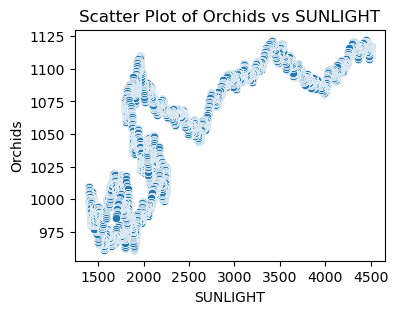

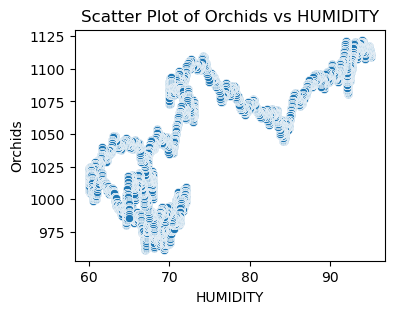

In [73]:
for feature in X.columns:
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=X[feature], y=Y)
    plt.title(f'Scatter Plot of Orchids vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Orchids')
    plt.show()

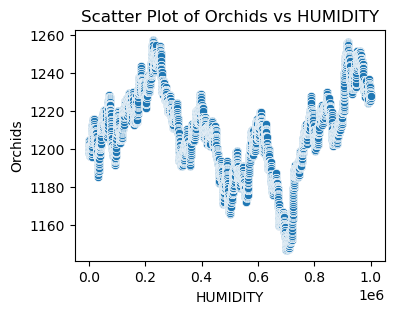

In [83]:
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=pricesday_1['timestamp'], y=pricesday_1['ORCHIDS'])
    plt.title(f'Scatter Plot of Orchids vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Orchids')
    plt.show()

In [87]:
# Calculate daily returns
stock_returns = pricesallday['ORCHIDS'].pct_change()
market_returns = pricesallday['SUNLIGHT'].pct_change()

# Calculate covariance and variance
covariance = np.cov(stock_returns, market_returns)
market_variance = np.var(market_returns)
beta = covariance / market_variance

print("Beta of the stock:", beta)

Beta of the stock: [[nan nan]
 [nan nan]]


In [89]:
filtered_df = pricesallday[(pricesallday['HUMIDITY'] >= 60) & (pricesallday['HUMIDITY'] <= 80)]
filtered_df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...,...
29998,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
29999,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
30000,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1
30001,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1


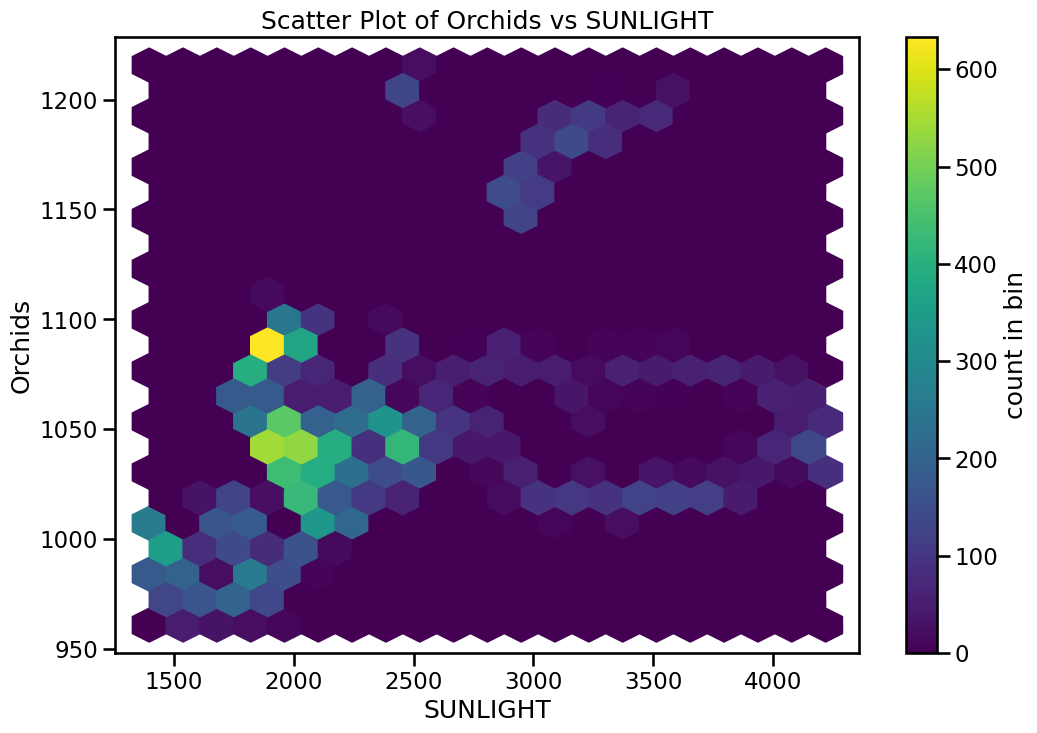

In [101]:
    plt.figure(figsize=(12, 8))
    plt.hexbin(filtered_df['SUNLIGHT'],filtered_df['ORCHIDS'], gridsize=20, cmap='viridis')
    plt.colorbar(label='count in bin')
    plt.title(f'Plot of Orchids vs SUNLIGHT')
    plt.xlabel("SUNLIGHT")
    plt.ylabel('Orchids')
    plt.show()

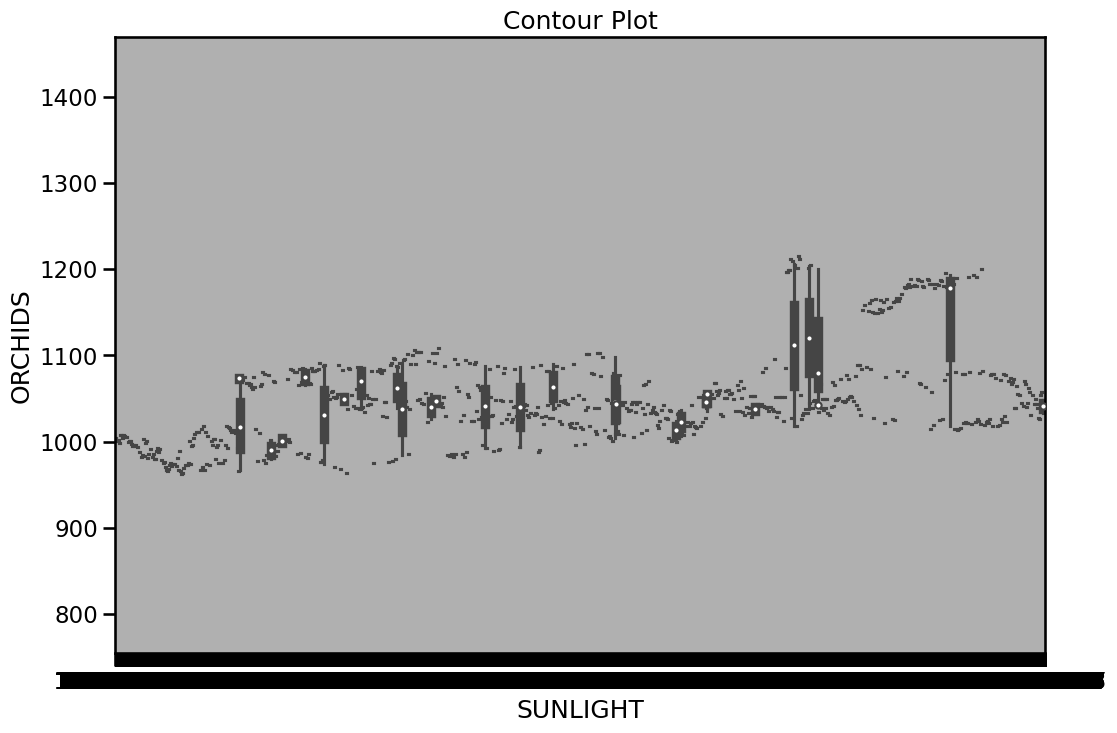

In [108]:
plt.figure(figsize=(12, 8))
sns.violinplot(x=filtered_df['SUNLIGHT'], y=filtered_df['ORCHIDS'], data=filtered_df)
plt.title('Contour Plot')
plt.xlabel('SUNLIGHT')
plt.ylabel('ORCHIDS')
plt.grid(True)
plt.show()
   

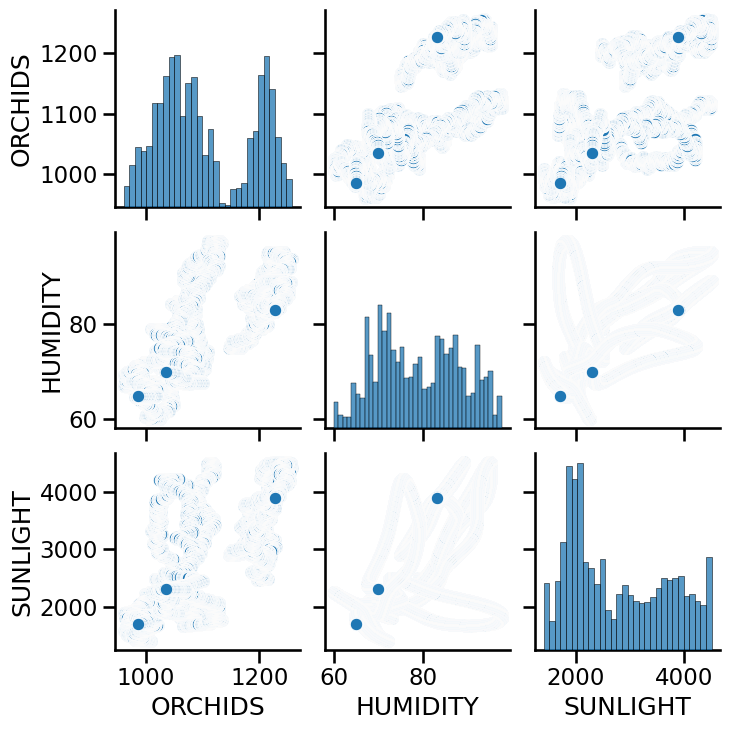

In [118]:
sns.pairplot(pricesallday[['ORCHIDS','HUMIDITY','SUNLIGHT']])

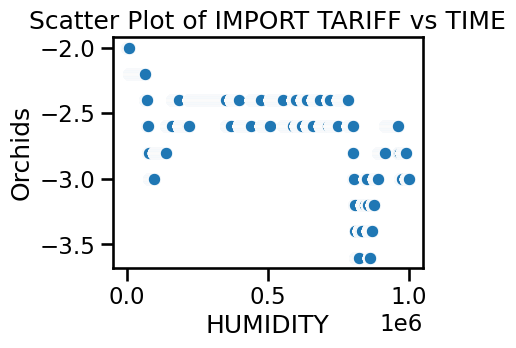

In [136]:
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=pricesday_1['timestamp'], y=pricesday_1['IMPORT_TARIFF'])
    plt.title(f'Scatter Plot of IMPORT TARIFF vs TIME')
    plt.xlabel(feature)
    plt.ylabel('Orchids')
    plt.show()